Homework set 3

## Problem 9.9

We consider Hansen (1985) stochastic growth model with indivisible labour.  
A fraction $\kappa$ of households works full time $h_0 < 1$, while the rest enjoys leisure.  
Aggregate labour supply in the economy: $\alpha h_0$.

The utility function:

$u(c,\kappa) = \log c + A \kappa \log (1 - h_0).$


Bellman equation:
$
V(\hat{k}_v,\hat{\eta}_g) = \max_{c,\kappa} \left\{
\log c + A \kappa \log (1 - h_0) + \beta \sum_{g^+=1}^m \pi_{gg^+} V(k^+,\hat{\eta}_{g^+})
\right\}
$

subject to:
$
(1-\delta) \hat{k}_v + \exp(\hat{\eta}_g) \hat{k}_v^\alpha (\kappa h_0)^{1-\alpha} = c + k^+.
$


Define the Lagrangian:
$
\mathcal{L} = \log c + A \kappa \log (1 - h_0) + \beta \sum_{g^+=1}^m \pi_{gg^+} V(k^+,\hat{\eta}_{g^+}) + \lambda \left[
(1-\delta) \hat{k}_v + \exp(\hat{\eta}_g) \hat{k}_v^\alpha (\kappa h_0)^{1-\alpha} - c - k^+
\right].
$

### Optimality conditions

$\frac{\partial{\mathcal{L}}}{\partial{c}}$:
$
\frac{1}{c} - \lambda = 0 \implies \lambda = \frac{1}{c}.
$

$\frac{\partial{\mathcal{L}}}{\partial{\kappa}}$:
$
A \log(1 - h_0) + \lambda \exp(\hat{\eta}_g) \hat{k}_v^\alpha (1-\alpha) (\kappa h_0)^{-\alpha} h_0 = 0.
$

$\frac{\partial{\mathcal{L}}}{\partial{k^+}}$:
$
\beta \sum_{g^+=1}^m \pi_{gg^+} V_{k}(k^+,\hat{\eta}_{g^+}) - \lambda = 0.
$

### Envelope theorem yields
$
V_{k}(\hat{k}_v,\hat{\eta}_g)
= \lambda \left[
(1-\delta) + \exp(\hat{\eta}_g) \alpha \hat{k}_v^{\alpha-1} (\kappa h_0)^{1-\alpha}
\right].
$

### Euler equation
$
\frac{1}{c} = \beta \sum_{g^+=1}^m \pi_{gg^+} V_{k}(k^+,\hat{\eta}_{g^+}).
$

In [1]:
#importing libraries
import numpy as np
from scipy.interpolate import CubicSpline
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt

In [2]:
#parameters
gamma, beta, alpha_c, alpha_i, depreciation_rate = 0.5, 0.99, 0.5, 0.5, 0.075
lower_bound, upper_bound, convergence_threshold, iterations, grid_size = 5.0, 100.0, 1e-6, 2000, 100
verbose = True

capital_grid = np.linspace(lower_bound, upper_bound, grid_size+1)
consumption_grid = capital_grid - (depreciation_rate*capital_grid)**(1/alpha_i)

In [3]:
def compute_next_k(consumption_capital, total_capital):
    return (1-depreciation_rate)*total_capital + (total_capital-consumption_capital)**alpha_i

def compute_next_consumption_capital (next_k,spline):
    next_consumption_capital = spline(next_k)
    return np.clip(next_consumption_capital, convergence_threshold, next_k-convergence_threshold)

def inspect_foc(consumption_guess, total_capital, spline):
    consumption_capital = np.clip(consumption_guess, convergence_threshold, total_capital-convergence_threshold)
    next_k = compute_next_k(consumption_capital, total_capital)
    next_consumption_capital = compute_next_consumption_capital(next_k, spline)

    first_term = beta*(1-depreciation_rate+alpha_i*(next_k-next_consumption_capital)**(alpha_i-1))
    second_term = np.maximum((consumption_capital - next_consumption_capital),convergence_threshold)**(1-alpha_c)
    third_term = ((next_k-next_consumption_capital)/(total_capital-consumption_capital))**(1-alpha_i)

    return consumption_capital - (first_term*second_term*third_term)**(-depreciation_rate/alpha_c)

def policy_function(consumption_grid):
    new_consumption_capital = np.zeros_like(consumption_grid)
    for iteration in range(iterations):
        spline = CubicSpline(capital_grid, consumption_grid, bc_type="natural", extrapolate=True)

        for i, total_capital in enumerate(capital_grid):
            solution = root_scalar(inspect_foc, args=(total_capital, spline), bracket=[convergence_threshold, total_capital-convergence_threshold], xtol=convergence_threshold)
            new_consumption_capital[i] = solution.root if solution.converged else capital_grid[i]

        convergence = np.max(np.abs(new_consumption_capital - consumption_grid) / np.maximum(np.abs(consumption_grid), convergence_threshold))

        if verbose:
            print(f"Iteration {iteration+1}: Convergence = {convergence}")

        if convergence < convergence_threshold:
            print(f"Converged in {iteration+1} iterations")
            return new_consumption_capital
        consumption_grid = new_consumption_capital

    print("Did not converge.")
    return new_consumption_capital





In [4]:

solved_consumption = policy_function(consumption_grid)
print(solved_consumption)

Iteration 1: Convergence = 0.9335863136473894
Iteration 2: Convergence = 0.0
Converged in 2 iterations
[2.68488177 2.70410782 2.71772849 2.72809965 2.73638401 2.74322318
 2.74900953 2.7539978  2.75836283 2.7622292  2.76568862 2.76881037
 2.77164799 2.77424364 2.77663103 2.77883757 2.78088574 2.78279426
 2.78457881 2.7862527  2.78782727 2.78931226 2.79071612 2.79204621
 2.79330895 2.79451    2.79565438 2.79674653 2.79779042 2.79878965
 2.79974737 2.80066644 2.80154945 2.80239826 2.80321601 2.80400417
 2.80476453 2.80549872 2.80620824 2.80689448 2.80755871 2.80820212
 2.80882579 2.80943075 2.81001792 2.81058818 2.81114234 2.81168117
 2.81220538 2.81271563 2.81321253 2.81369669 2.81416863 2.81462888
 2.81507793 2.81551622 2.81594419 2.81636225 2.81677079 2.81717015
 2.8175607  2.81794275 2.81831661 2.81868259 2.81904095 2.81939197
 2.81973588 2.82007295 2.82040339 2.82072742 2.82104525 2.82135708
 2.82166309 2.82196348 2.82225841 2.82254805 2.82283256 2.82311209
 2.82338679 2.82365679 2.8

## 9.11

Consider the following tax scheme:
$
g_t = \tau^w_t w_t l_t.
$

Lump sum taxation is excluded

## Household utility

Households maximize expected lifetime utility:
$
\max_{\{c_t, l_t, k_{t+1}\}} E_0 \sum_{t=0}^\infty \beta^t u(c_t, l_t)
$

subject to:
$
c_t + k_{t+1} = (1-\delta) k_t + (1-\tau^w_t) w_t l_t + r_t k_t.
$


## Lagrangian and optimality conditions

$
\mathcal{L} = E_0 \sum_{t=0}^\infty \beta^t \big[
u(c_t, l_t) + \lambda_t \big((1-\delta) k_t + (1-\tau^w_t) w_t l_t + r_t k_t - c_t - k_{t+1}\big)
\big].
$




### $\frac{\partial{\mathcal{L}}}{{\partial{(c_t)}}}$:
$
u_c(c_t, l_t) - \lambda_t = 0 
\quad \Rightarrow \quad \lambda_t = u_c(c_t, l_t).
$


### $\frac{\partial{\mathcal{L}}}{\partial{(l_t)}}$:
$
u_l(c_t, l_t) + \lambda_t (1-\tau^w_t) w_t = 0
$
$
\Rightarrow u_l(c_t, l_t) = - u_c(c_t, l_t) (1-\tau^w_t) w_t.
$


### $\frac{\partial{\mathcal{L}}}{\partial{(k_{t+1})}}$:
$
-\lambda_t + \beta E_t[\lambda_{t+1} (r_{t+1} + 1 - \delta)] = 0
$
$
\Rightarrow 1 = \beta E_t \left[\frac{u_c(c_{t+1}, l_{t+1})}{u_c(c_t, l_t)} (r_{t+1} + 1 - \delta) \right].
$


## Euler equation:
$
1 = \beta E_t \left[\frac{u_c(c_{t+1}, l_{t+1})}{u_c(c_t, l_t)} (r_{t+1} + 1 - \delta) \right].
$

## Intratemporal (labour supply) condition:
$
u_l(c_t, l_t) = - u_c(c_t, l_t) (1-\tau^w_t) w_t.
$

## B Implementation

* Modification of household budget constraint:
$
c_t + k_{t+1} = (1-\delta) k_t + (1-\tau^w_t) w_t l_t + r_t k_t.
$

* Government tax revenue:
$
g_t = \tau^w_t w_t l_t.
$

---

### Computational steps:
- Discretize productivity shocks 
- Use a capital grid and shock grid to iterate and state \((k_t, \eta_t)\):
- Compute \( w_t, r_t \) from the production function.
- Compute the tax rate:
$
\tau^w_t = \frac{g_t}{w_t l_t}.
$
- Update the function with $((1-\tau^w_t)w_tl_t)$ instead of $(w_t l_t)$.

---

## C Policy comparison
Compare 
1. Constant government spending: $(g_t = \bar{g})$
2. Procyclical government consumption: $(g_t)$ increasing function in $(\eta_t)$


### Effect on endogenous \tau:
- constant spending:  
  When $(w_t l_t)$ rises $(\tau^w_t = g_t / (w_t l_t))$ falls, leading to a countercyclical tax rate.

- **Procyclical $(g_t)$**:  
  $(g_t)$ rises with $(w_t l_t)$, keeping $(\tau^w_t)$ stable or increasing.

---

### Comparison to lump-sum:
- With lump-sum taxes, optimality condiotions become:
$
u_l(c_t, l_t) = - u_c(c_t, l_t) w_t.
$
This does not affect labor incentives, only income.


$
u_l(c_t, l_t) / u_c(c_t, l_t) = - (1-\tau^w_t) w_t.
$
Affects labour incentives and welfare.

---

## Welfare cost
- Simulate the model for both cases
- Plot:
    * $(\tau^w_t)$ in $t$
    * Labour supply $(l_t)$
    * Output $(y_t)$, consumption $(c_t)$
- Expected welfare:
$
E_0 \sum_{t=0}^\infty \beta^t u(c_t, l_t).
$
- Compare policies.

---

## summery:
* Distortionary taxes endogenises variation in tax rates.
* Procyclical government spending keeps $\tau$ stable, but increase volatility.
* Constant government spending implies countercyclical $\tau$. This has a consumption smoothing effect, but crowds out labor during recession.


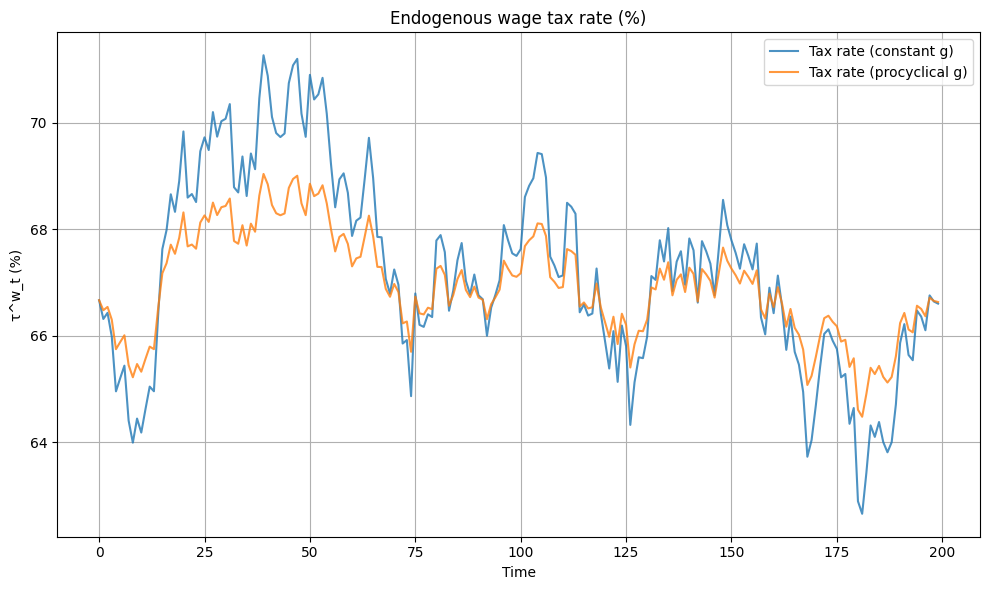

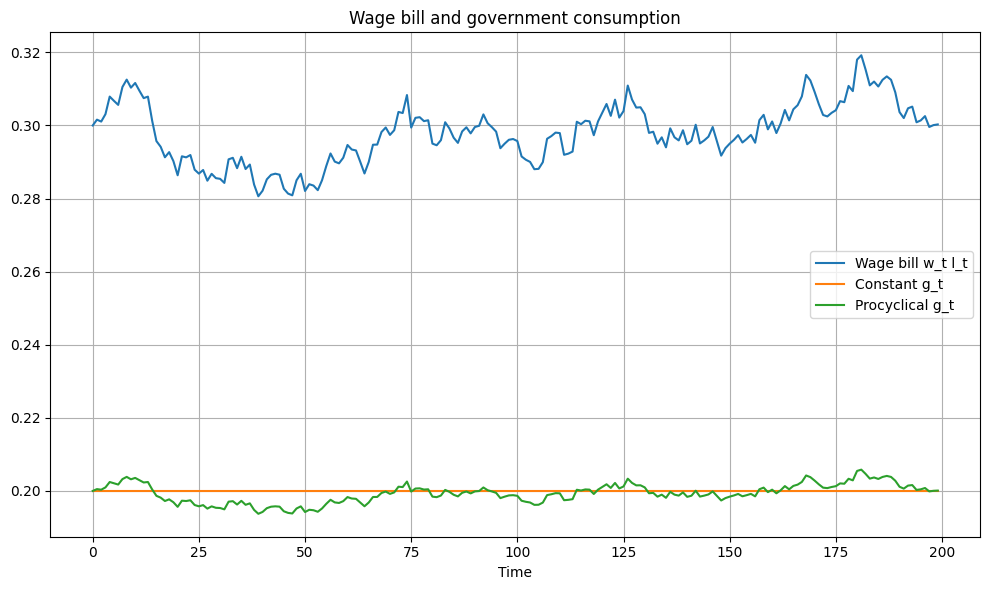

In [5]:

np.random.seed(42)

periods = 200  # periods
persistence = 0.95
shock_std = 0.01

#Simulate productivity shocks
eta = np.zeros(periods)
for t in range(1, periods):
    eta[t] = persistence * eta[t-1] + shock_std * np.random.randn()

# Assume baseline wage and labour supply (simplified)
w_base = np.exp(eta)  # wage as a simple function in eta (productivity)
l_base = 0.3 + 0.02 * eta  # Productivity as a simple function in eta (increasing)

# Scenario 1: constant spend
g_const = np.full(periods, 0.2)  # some constant level
tau_const = g_const / (w_base * l_base)

# Scenario 2: procyclical spend
g_procyclical = 0.2 * (1 + 0.5 * eta)  # spend increases in booms
tau_procyclical = g_procyclical / (w_base * l_base)

# Plot
plt.figure(figsize=(10,6))
plt.plot(tau_const * 100, label="Tax rate (constant)", alpha=0.8)
plt.plot(tau_procyclical * 100, label="Tax rate (procyclical)", alpha=0.8)
plt.title("Endogenous wage tax rate (%)")
plt.xlabel("Time")
plt.ylabel("τ^w_t (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: plot consumption or labour supply variations
plt.figure(figsize=(10,6))
plt.plot(w_base * l_base, label="Wage bill w_t l_t")
plt.plot(g_const, label="Constant g_t")
plt.plot(g_procyclical, label="Procyclical g_t")
plt.title("Wage bill and government consumption")
plt.xlabel("Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
